## Final Project Submission

Please fill out:
* Student name: Christos, Marcos and Rachel
* Student pace: Full Time
* Scheduled project review date/time: 02/19/2021 - 5p.m. CT
* Instructor name: Max Barry
* Blog post URL: www.google.com


# **Goal**: To create a model to get a criterion as high of accuracy as possible using Multiple Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from sklearn import ensemble
import yaml
%matplotlib inline

In [228]:
# Reading and naming our dataframe
df = pd.read_csv("data/kc_house_data.csv")

## Here we start our exploratory data analysis

In [229]:
# Checking the shape of it to understand how many columns and rows we have
df.shape

(21597, 21)

In [230]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [231]:
# Getting statiscal values for our dataset, easy to look for outliers
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [232]:
df.duplicated().sum()

0

In [233]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

So, after the first analysis, we realize that:

1 - We don't have any duplicates

2 - We have some NaN values

3 - We have some outliers based on price, number of bedrooms, square footage - they could be either correlated (justified) or a mistake.

4 - We have some potential values that could be aggregated (like ZipCode), or deleted because have similar meaning.

5 - After that we would have more unique values, poiting towards being optimal to transform into a categorical value

### Here we start manipulation of the data

Let's create a column with the year that it was sold, instead of the full date that is hard to work with.

In [234]:
# First we create a for loop to create a list with only the years of each sale
year_list = []
for x in df['date']:
    year_list.append(x[-4:])

df['year_sold'] = year_list

In [235]:
# We choose to check if our value is string, and in case of positive, change to float because of the function we want to run
type(df['year_sold'][0])

str

In [236]:
df['year_sold'] = df['year_sold'].astype(float)

In [304]:
df['year_sold'] = np.where(df['year_sold']== '2014', 0, 1)

In [237]:
# Now we drop date and id columns, because we don't want any noise
# in our model with variables that actually don't mean much
# Also for some of the code it try to transform everything into float, and it can't candle the date format
df = df.drop(columns=['id', 'date'])

In [238]:
# Now we want to clean our data, replacing NaN Values and weird values
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [239]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [240]:
# The 'condition' columns also had a few values ?, that we could as well replace with 0's
df['condition'] = np.where(df['condition']=='?', 0, df['condition'])

In [241]:
df['condition'] = df['condition'].astype(float)

> The choice to replace with 0's in these two cases is that we read the 0 as lack of something. In the first case, lack of a basement in the house, in the second, lack of the evaluation.

# Which strategy to adopt with the NaN Values?

In [242]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
year_sold           0
dtype: int64

In [243]:
df['waterfront'].value_counts()



0.0    19075
1.0      146
Name: waterfront, dtype: int64

Maybe replace nan values with 0, since it's very unlikely that such important thing would not be mentioned

In [244]:
df['yr_renovated'].value_counts()


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [245]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

0 in these 2 last columns('yr_renovated' and 'view') is adopted as "We don't know this value"(basically a NaN) or we don't have this (a view or a renovation). So 0 would be also a good replacement for it.

So based on our dataframe all the values are fitable of replacing the NaN value for a 0

In [246]:
df = df.fillna(0)

In [247]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
dtype: int64

No NaN values, good to go.

### Let's take a look at the possible places that we could make a categorical variable, maybe use OneHotEncoder on it

In [248]:
df.nunique()

price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     303
yr_built          116
yr_renovated       70
zipcode            70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
year_sold           2
dtype: int64

In [249]:
list_unique = list(df.nunique())
list_unique.sort()

In [250]:
print(list_unique)


[2, 2, 5, 5, 6, 11, 12, 29, 70, 70, 116, 303, 751, 777, 942, 1034, 3622, 5033, 8682, 9776]


So we see that the first 5 values are under 10 unique values, which means it's a good candidate to be a categorical variable

And they are 'year_sold', 'waterfront', 'view', 'condition' and 'floors'.

The year_sold is because we made this one, since we were having problems with date format before.

In [251]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [252]:
df['year_sold'].value_counts()

2014.0    14622
2015.0     6975
Name: year_sold, dtype: int64

In [253]:
# df['waterfront'] and df['year_sold'] are pretty much done

In [254]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [255]:
df['condition'].value_counts()

3.0    14020
4.0     5677
5.0     1701
2.0      170
1.0       29
Name: condition, dtype: int64

In [256]:
# df['view'] and df['condition'] are well fitted with their values, so we can say it's categorical already

In [257]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [258]:
# df['floors'] has some different values that are float but that's ok, we are going to let the model deal with it.

### Let's create a new column to simply tell us if the house has a basement or not

In [259]:
# Replacing any abnormal values with 0's
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [260]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [261]:
df['has_basement'] = np.where(df['sqft_basement']>0, 1, 0)

In [262]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3.0,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014.0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014.0,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015.0,0


## Now we are going to check for values over 0.7 and try to understand them better


In [263]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,has_basement
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,...,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.003727,0.178264
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,...,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.009949,0.158412
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,...,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.026577,0.159863
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,...,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.029014,0.201198
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,...,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005628,-0.034889
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,...,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.022352,-0.252465
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,...,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,-0.005018,0.039220
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,...,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083,0.001239,0.176905
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,...,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.045898,0.130542
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,...,0.165843,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981,-0.030635,0.050701


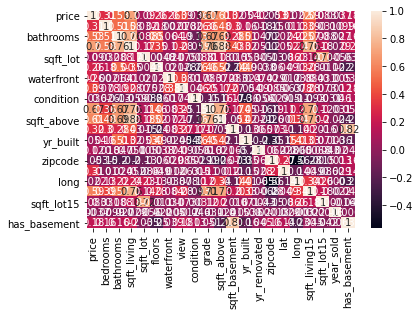

In [264]:
sns.heatmap(df.corr(), annot=True);


In [265]:
# These 2 functions have an objective to give us the highest n correlation in our data frame.
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df, 15))

sqft_living    sqft_above       0.876448
sqft_basement  has_basement     0.820893
sqft_living    grade            0.762779
               sqft_living15    0.756402
grade          sqft_above       0.756073
bathrooms      sqft_living      0.755758
sqft_above     sqft_living15    0.731767
sqft_lot       sqft_lot15       0.718204
grade          sqft_living15    0.713867
price          sqft_living      0.701917
bathrooms      sqft_above       0.686668
price          grade            0.667951
bathrooms      grade            0.665838
price          sqft_above       0.605368
               sqft_living15    0.585241
dtype: float64


### df['sqft_lot'] < df['sqft_lot15']

In [266]:
print(df.corr()['sqft_lot'].sum(), df.corr()['sqft_lot15'].sum())

2.551625446311941 2.6278052992813197


In [267]:
# Sqft_lot has a lower correlation with other variables and a better one with price - a no brainer

### df['sqft_living'] > df['sqft_living15']

In [268]:
print(df.corr()['sqft_living'].sum(), df.corr()['sqft_living15'].sum())

7.533795407735247 6.2830072734095905


In [269]:
# But sqft_living is better correlated with Price by quite a lot, and also we are not sure about what sqft_lot15 means, 
# so from a business understanding standpoint, is better to go with sqft_lot

In [270]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df).fit()
pricekc_mod_summtest = pricekc_modtest.summary()

### Here we did some modeling changing variables and choosing different datasets without different outliers (Without the highest price, Without the top 3 highest price, without the lowest price and etc)

In [271]:
price_mod_summ

NameError: name 'price_mod_summ' is not defined

In [182]:
pricekc_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     4264.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:41:26   Log-Likelihood:            -2.9895e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21590   BIC:                         5.980e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.424e+04   7458.024      9.954      0.000    5.96e+04    8.89e+04
bedrooms    -5.331e+04   2287.434    -23.307      0.000   -5.78e+04   -4.88e+04
bathrooms    7272.2393   3693.899      1.969      0.049      31.924    1.45e+04
sqft_living   302.3173      3.055     98.969      0.000     296.330     308.305
sqft_lot       -0.3736      0.042     -8.947      0.000      -0.455      -0.292
floors       1090.7686   3653.865      0.299      0.765   -6071.077    8252.614
waterfront   8.288e+05   2.08e+04     39.802      0.000    7.88e+05     8.7e+05
==============================================================================
Omnibus:                    13040.834   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389221.484
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      23.238   Cond. No.                     5.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
pricekc_mod_summ1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     2919.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:42:25   Log-Likelihood:            -2.9755e+05
No. Observations:               21597   AIC:                         5.951e+05
Df Residuals:                   21585   BIC:                         5.952e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.346e+06   1.47e+05     36.340      0.000    5.06e+06    5.63e+06
bedrooms     -5.719e+04   2166.643    -26.394      0.000   -6.14e+04   -5.29e+04
bathrooms     5.821e+04   3790.596     15.355      0.000    5.08e+04    6.56e+04
sqft_living    277.7812      2.943     94.383      0.000     272.012     283.550
sqft_lot        -0.3242      0.039     -8.237      0.000      -0.401      -0.247
floors         5.76e+04   3849.233     14.965      0.000    5.01e+04    6.51e+04
waterfront    5.762e+05    2.1e+04     27.475      0.000    5.35e+05    6.17e+05
view          5.964e+04   2375.236     25.110      0.000     5.5e+04    6.43e+04
condition     1.816e+04   2680.272      6.775      0.000    1.29e+04    2.34e+04
yr_built     -2777.3459     74.450    -37.305      0.000   -2923.272   -2631.419
yr_renovated    15.6191      4.592      3.401      0.001       6.618      24.620
has_basement -4733.9297   3701.442     -1.279      0.201    -1.2e+04    2521.170
==============================================================================
Omnibus:                    13103.089   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           469428.472
Skew:                           2.351   Prob(JB):                         0.00
Kurtosis:                      25.351   Cond. No.                     4.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
pricekc_mod_summ2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3037.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:43:15   Log-Likelihood:            -2.9564e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21582   BIC:                         5.914e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.192e+06   3.06e+06      2.348      0.019    1.19e+06    1.32e+07
bedrooms      -4.97e+04   1989.858    -24.979      0.000   -5.36e+04   -4.58e+04
bathrooms     5.108e+04   3471.770     14.712      0.000    4.43e+04    5.79e+04
sqft_living    269.8223      2.741     98.457      0.000     264.451     275.194
sqft_lot        -0.0527      0.037     -1.431      0.152      -0.125       0.019
floors        3.108e+04   3623.477      8.579      0.000     2.4e+04    3.82e+04
waterfront    5.889e+05   1.92e+04     30.675      0.000    5.51e+05    6.27e+05
view          6.621e+04   2189.356     30.242      0.000    6.19e+04    7.05e+04
condition     2.486e+04   2475.902     10.039      0.000       2e+04    2.97e+04
yr_built     -1846.7636     74.216    -24.884      0.000   -1992.233   -1701.295
yr_renovated    25.6291      4.208      6.090      0.000      17.380      33.878
has_basement -3.601e+04   3529.392    -10.202      0.000   -4.29e+04   -2.91e+04
zipcode       -715.6072     34.755    -20.590      0.000    -783.729    -647.485
lat           6.997e+05   1.12e+04     62.613      0.000    6.78e+05    7.22e+05
long         -2.721e+05   1.36e+04    -19.955      0.000   -2.99e+05   -2.45e+05
==============================================================================
Omnibus:                    15312.037   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           844322.716
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      33.105   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [272]:
columnsdf = list(df.columns)

In [273]:
pd.plotting.scatter_matrix(df[columnsdf], figsize=(10,12));

Error in callback <function flush_figures at 0x000002618ACDEF70> (for post_execute):


KeyboardInterrupt: 

In [217]:
price_kc3 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod3 = ols(formula=price_kc3, data=df).fit()
pricekc_mod_summ3 = pricekc_mod3.summary()

In [218]:
pricekc_mod_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2264.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:03:50   Log-Likelihood:            -2.1586e+05
No. Observations:               15762   AIC:                         4.317e+05
Df Residuals:                   15747   BIC:                         4.319e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      5.52e+06   3.61e+06      1.528      0.127   -1.56e+06    1.26e+07
bedrooms     -5.089e+04   2310.937    -22.020      0.000   -5.54e+04   -4.64e+04
bathrooms     5.471e+04   4097.881     13.352      0.000    4.67e+04    6.27e+04
sqft_living    274.5982      3.218     85.334      0.000     268.291     280.906
sqft_lot        -0.0648      0.043     -1.511      0.131      -0.149       0.019
floors        2.829e+04   4275.579      6.617      0.000    1.99e+04    3.67e+04
waterfront    5.758e+05   2.16e+04     26.621      0.000    5.33e+05    6.18e+05
view          6.437e+04   2622.845     24.541      0.000    5.92e+04    6.95e+04
condition     2.457e+04   2923.468      8.404      0.000    1.88e+04    3.03e+04
yr_built     -1930.9910     88.269    -21.876      0.000   -2104.008   -1757.974
yr_renovated    21.5838      4.595      4.698      0.000      12.578      30.590
has_basement -3.867e+04   4148.396     -9.322      0.000   -4.68e+04   -3.05e+04
zipcode       -690.8458     40.960    -16.866      0.000    -771.132    -610.559
lat           6.944e+05   1.32e+04     52.762      0.000    6.69e+05     7.2e+05
long         -2.693e+05    1.6e+04    -16.790      0.000   -3.01e+05   -2.38e+05
==============================================================================
Omnibus:                    11504.666   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           702110.838
Skew:                           2.921   Prob(JB):                         0.00
Kurtosis:                      35.170   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [490]:
pricekc_mod_summtest

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        09:29:28   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.091e+04   6638.826     12.187      0.000    6.79e+04    9.39e+04
bedrooms    -5.783e+04   2322.987    -24.896      0.000   -6.24e+04   -5.33e+04
sqft_living   314.6011      2.344    134.232      0.000     310.007     319.195
==============================================================================
Omnibus:                    14391.571   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488612.629
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.654   Cond. No.                     8.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [446]:
price_kc4 = "price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+yr_built+has_basement+zipcode+lat+long"
pricekc_mod4 = ols(formula=price_kc4, data=df).fit()
pricekc_mod_summ4 = pricekc_mod4.summary()

In [447]:
pricekc_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3534.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:58:43   Log-Likelihood:            -2.9566e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21584   BIC:                         5.914e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.671e+06   3.05e+06      2.517      0.012     1.7e+06    1.36e+07
has_basement[T.1] -3.597e+04   3530.191    -10.190      0.000   -4.29e+04   -2.91e+04
bedrooms          -4.986e+04   1984.074    -25.130      0.000   -5.37e+04    -4.6e+04
bathrooms          5.379e+04   3447.169     15.605      0.000     4.7e+04    6.05e+04
sqft_living         269.1469      2.713     99.219      0.000     263.830     274.464
floors             3.232e+04   3618.494      8.933      0.000    2.52e+04    3.94e+04
waterfront         5.941e+05   1.92e+04     30.951      0.000    5.57e+05    6.32e+05
view               6.642e+04   2188.749     30.345      0.000    6.21e+04    7.07e+04
condition           2.26e+04   2449.032      9.228      0.000    1.78e+04    2.74e+04
yr_built          -1971.8868     71.038    -27.758      0.000   -2111.126   -1832.648
zipcode            -719.6080     34.777    -20.692      0.000    -787.774    -651.443
lat                6.987e+05   1.11e+04     62.675      0.000    6.77e+05    7.21e+05
long              -2.738e+05   1.34e+04    -20.379      0.000      -3e+05   -2.48e+05
==============================================================================
Omnibus:                    15345.675   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           851698.630
Skew:                           2.834   Prob(JB):                         0.00
Kurtosis:                      33.238   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [470]:
price_kc5 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod5 = ols(formula=price_kc5, data=d).fit()
pricekc_mod_summ5 = pricekc_mod5.summary()

In [471]:
pricekc_mod_summ5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3037.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:02:52   Log-Likelihood:            -2.9564e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21582   BIC:                         5.914e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.192e+06   3.06e+06      2.348      0.019    1.19e+06    1.32e+07
has_basement[T.1] -3.601e+04   3529.392    -10.202      0.000   -4.29e+04   -2.91e+04
bedrooms           -4.97e+04   1989.858    -24.979      0.000   -5.36e+04   -4.58e+04
bathrooms          5.108e+04   3471.770     14.712      0.000    4.43e+04    5.79e+04
sqft_living         269.8223      2.741     98.457      0.000     264.451     275.194
sqft_lot             -0.0527      0.037     -1.431      0.152      -0.125       0.019
floors             3.108e+04   3623.477      8.579      0.000     2.4e+04    3.82e+04
waterfront         5.889e+05   1.92e+04     30.675      0.000    5.51e+05    6.27e+05
view               6.621e+04   2189.356     30.242      0.000    6.19e+04    7.05e+04
condition          2.486e+04   2475.902     10.039      0.000       2e+04    2.97e+04
yr_built          -1846.7636     74.216    -24.884      0.000   -1992.233   -1701.295
yr_renovated         25.6291      4.208      6.090      0.000      17.380      33.878
zipcode            -715.6072     34.755    -20.590      0.000    -783.729    -647.485
lat                6.997e+05   1.12e+04     62.613      0.000    6.78e+05    7.22e+05
long              -2.721e+05   1.36e+04    -19.955      0.000   -2.99e+05   -2.45e+05
==============================================================================
Omnibus:                    15312.037   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           844322.716
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      33.105   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
# We checked for outliers by our distribuition, verified for the 75 percentile, 95 percentile and tried without them and
# realized that our R-Squared was actually dropping it, meaning that they are significant for our model.

In [220]:
# We checked for outliers by our distribuition in the other side, veryfing if cheaper houses
# would interfer a lot and tried FSM without them and realized that our 
# R-Squared was actually dropping it, meaning that they are significant for our model.

# Linear Regression

In [276]:
y = df['price']
predictors = df.drop('price', axis=1)
linreg = LinearRegression()
linreg.fit(predictors, y)
linreg.coef_

array([-3.61316358e+04,  4.23449442e+04,  1.01974421e+02,  1.24942937e-01,
        7.54172461e+03,  6.18668411e+05,  5.27993872e+04,  2.79828303e+04,
        9.73967228e+04,  7.77810193e+01,  5.50768762e+01, -2.64094401e+03,
        2.43178923e+01, -5.82484106e+02,  6.03762755e+05, -2.18966498e+05,
        2.16721283e+01, -3.84935205e-01,  3.06675215e+04, -7.51507140e+03])

In [277]:
linreg.intercept_

-55618181.38306714

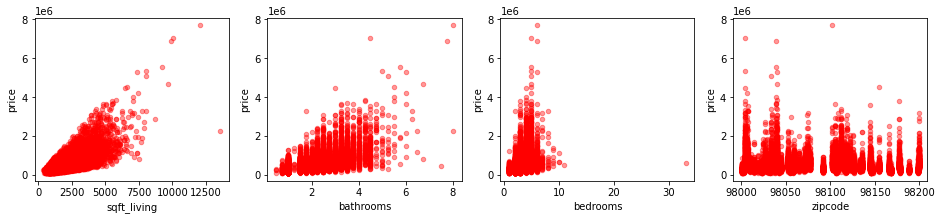

In [283]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'bathrooms', 'bedrooms', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

<ipython-input-284-661fd435d431>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:titl

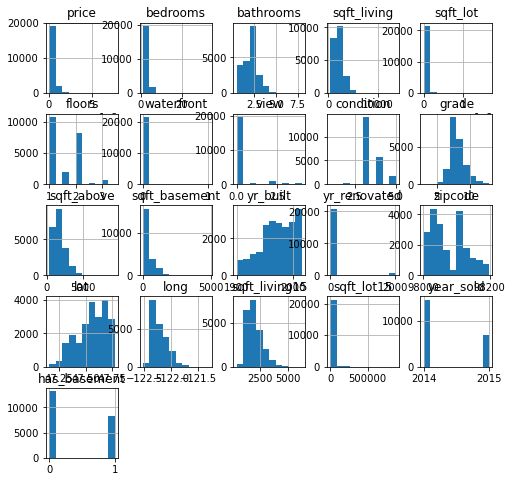

In [284]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax)

In [285]:
df['yr_renovated'].nunique()
# 0.117855 corr w Price

70

In [286]:
df['sqft_lot'].nunique()
# 0.089876 corr w Price

9776

# Train Test Split

In [287]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3.0,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014.0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014.0,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015.0,0


In [288]:
y = df.price
X = df.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=22)

In [289]:
lr = LinearRegression()

In [290]:
lr.fit(X_train, y_train)

LinearRegression()

In [291]:
lr.score(X_train, y_train)

0.7029552243402394

In [292]:
lr.coef_


array([-3.35270433e+04,  3.55856226e+04,  1.16710996e+02,  1.17916056e-01,
        1.32906692e+04,  5.96620249e+05,  5.42303461e+04,  2.87749329e+04,
        9.88004829e+04,  5.62196388e+01,  2.84095559e+01, -2.59868330e+03,
        2.56297936e+01, -5.67325192e+02,  6.04911676e+05, -2.13401331e+05,
        2.60816422e+01, -2.84744879e-01,  3.20057597e+04, -1.28386161e+03])

<AxesSubplot:>

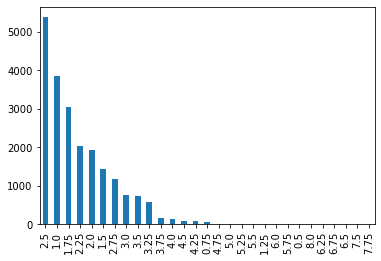

In [293]:
df['bathrooms'].value_counts().plot(kind='bar')

<AxesSubplot:>

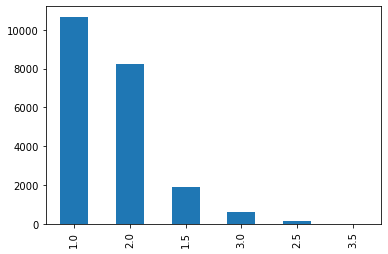

In [294]:
df['floors'].value_counts().plot(kind='bar')

C:\Users\celes\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

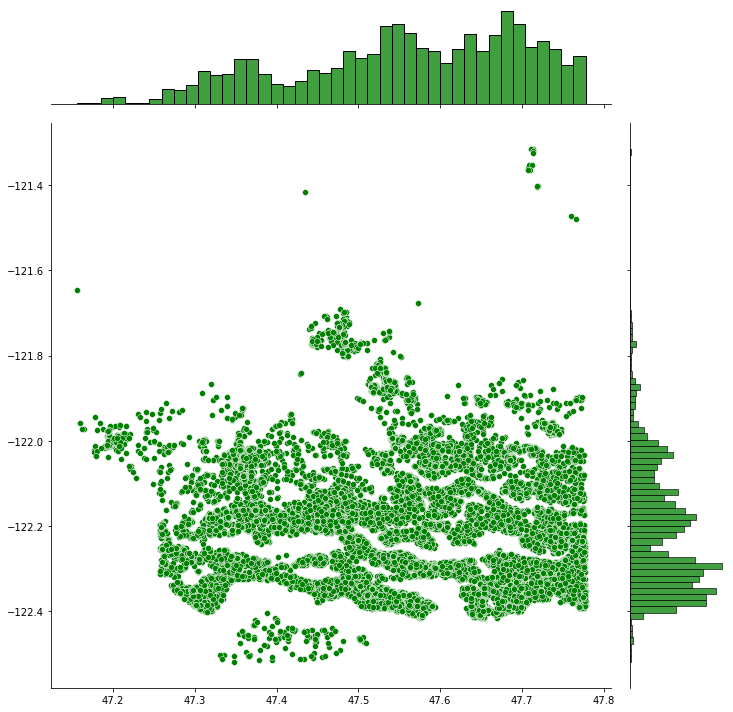

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [323]:
plt.figure(figsize=(12, 12))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10, color='g')
plt.ylabel('Long', fontsize=12)
plt.xlabel('Lat', fontsize=12)
plt.show()
sns.despine

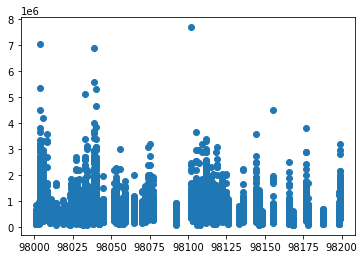

In [295]:
plt.scatter(df.zipcode, df.price)

In [296]:
df_without_outliers = df.sort_values(['price'], ascending=False)[3:]

Text(0.5, 1.0, 'Prices per ZipCode (without the top 3)')

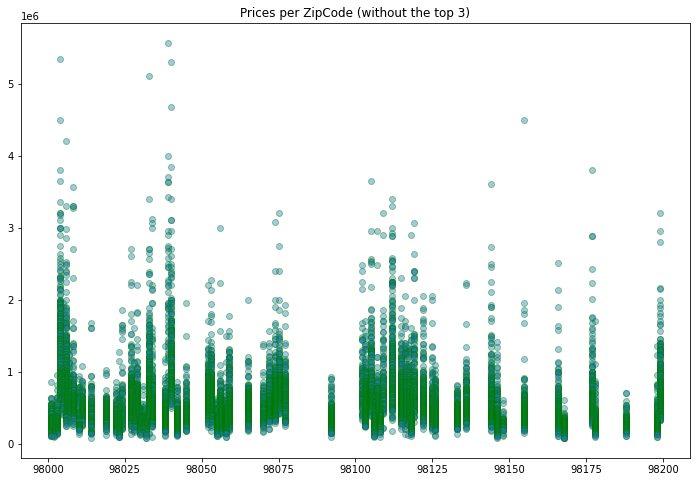

In [298]:
plt.figure(figsize = (12,8))
plt.scatter(df_without_outliers.zipcode,df_without_outliers.price, alpha=0.4, edgecolors='g')
plt.title("Prices per ZipCode (without the top 3)")

In [309]:
y = df.price
X = df.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=30)

In [310]:
lr.fit(X_train, y_train)

LinearRegression()

In [311]:

lr.score(X_train, y_train)

0.7004710391222799

In [312]:
lr.score(X_test, y_test)

0.6974431305153398

In [313]:
lr.coef_

array([-4.34426881e+04,  4.88933787e+04,  1.16737468e+02,  1.17063688e-01,
        1.79082390e+03,  6.60386888e+05,  4.99199935e+04,  2.75669100e+04,
        9.66959014e+04,  6.71568568e+01,  5.47596040e+01, -2.62542129e+03,
        2.27391703e+01, -5.60558693e+02,  6.04143527e+05, -2.19138157e+05,
        2.16368935e+01, -3.60591126e-01,  0.00000000e+00, -1.94963073e+04])

### Here we try some Gradient Boosting Regressor

In [314]:
egbr = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 25,
                                         learning_rate = 0.1, loss = 'ls')

In [315]:
egbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=25, n_estimators=500)

In [803]:
egbr.score(X_test, y_test)

0.8999001220324832

### Here we try some KFold

In [316]:
X = df.drop('price', axis=1)
y = df.price

In [317]:
kf = KFold(n_splits=5)

train_r2 = []
test_r2 = []
for train_ind, test_ind in kf.split(X, y):
    
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]
    
    lr.fit(X_train, y_train)
    train_r2.append(lr.score(X_train, y_train))
    test_r2.append(lr.score(X_test, y_test))

In [318]:
np.mean(train_r2)

0.700645058438704

In [319]:
np.mean(test_r2)

0.6943073080184744

### Here some Polynomial Features

In [320]:
poly_2 = PolynomialFeatures(2)

df_poly = pd.DataFrame(
            poly_2.fit_transform(df.drop('price', axis=1))
                      )

X = df_poly
y = df.price

In [321]:
np.mean(train_r2)

0.700645058438704

In [322]:
np.mean(test_r2)

0.6943073080184744

In [280]:
# YEAR_RENOVATED - SQF_LOT dont add anything